In [1]:
import torch
from dataset.utils import *
from losses import *
from utils import *
from net.resnet import *
from net.googlenet import *
from net.bn_inception import *
from train import train_model
import pytorch_metric_learning as pml

In [2]:
def redefine_train_parameters():
    global device, epochs, learning_rate, loss_lr, num_classes, embedding_size
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 5
    learning_rate = 0.001
    loss_lr = 0.01
    num_classes = get_num_classes(train_dataset)
    embedding_size = num_classes

In [3]:
batch_size = 128
train_dataset = make_dataset('LFW', split='train', image_size=100)
test_dataset = make_dataset('LFW', split='test', image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Files already downloaded and verified
Files already downloaded and verified


In [36]:
fetch_time(train_loader)

0.13792657852172852

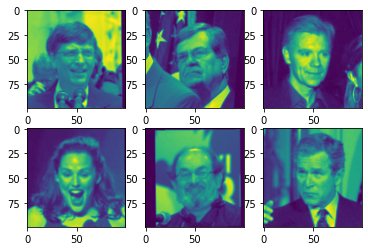

In [37]:
display_images(train_loader, h=2,w=3)

In [38]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00      19.0
          23       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       3.0
          30       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       3.0
          43       0.00      0.00      0.00       0.0
          44       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
evaluate_cos(model, test_loader)

100%|██████████| 29/29 [00:04<00:00,  6.79it/s]


R@1 : 6.634
R@2 : 9.115
R@4 : 12.864
R@8 : 17.125
R@16 : 21.926
R@32 : 27.535


[0.06634304207119741,
 0.09115426105717368,
 0.12864077669902912,
 0.17125134843581447,
 0.21925566343042072,
 0.2753505933117584]

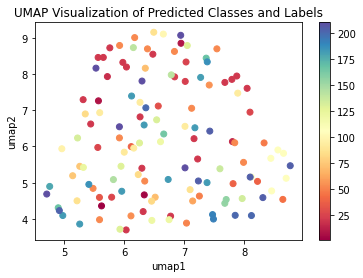

In [40]:
visualize_umap(model, test_loader)

In [47]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    use_loss_optimizer=True,
                    save_path='./saved_models/resnet50_lfw_proxy_library.ptm')

Step: [10/75] Epoch [1/20] Loss: 1.4652 Time: 1.8942
Step: [20/75] Epoch [1/20] Loss: 2.8836 Time: 3.7813
Step: [30/75] Epoch [1/20] Loss: 4.3009 Time: 5.6355
Step: [40/75] Epoch [1/20] Loss: 5.7010 Time: 7.5350
Step: [50/75] Epoch [1/20] Loss: 7.1188 Time: 9.4040
Step: [60/75] Epoch [1/20] Loss: 8.5091 Time: 11.2880
Step: [70/75] Epoch [1/20] Loss: 9.8989 Time: 13.1717
Step: [75/75] Epoch [1/20] Loss: 10.5611 Time: 14.0231
Epoch [1/20] Loss: 10.5611 Time: 14.0236
Step: [10/75] Epoch [2/20] Loss: 1.0503 Time: 15.8746
Step: [20/75] Epoch [2/20] Loss: 2.0723 Time: 17.7736
Step: [30/75] Epoch [2/20] Loss: 3.1251 Time: 19.6647
Step: [40/75] Epoch [2/20] Loss: 4.2831 Time: 21.5287
Step: [50/75] Epoch [2/20] Loss: 5.3920 Time: 23.4030
Step: [60/75] Epoch [2/20] Loss: 6.5305 Time: 25.3621
Step: [70/75] Epoch [2/20] Loss: 7.6386 Time: 27.3513
Step: [75/75] Epoch [2/20] Loss: 8.1618 Time: 28.2000
Epoch [2/20] Loss: 8.1618 Time: 28.2004
Step: [10/75] Epoch [3/20] Loss: 0.9668 Time: 30.1102
Step:

Step: [20/75] Epoch [18/20] Loss: 1.0002 Time: 238.7695
Step: [30/75] Epoch [18/20] Loss: 1.4958 Time: 240.6046
Step: [40/75] Epoch [18/20] Loss: 1.9880 Time: 242.4417
Step: [50/75] Epoch [18/20] Loss: 2.4839 Time: 244.2970
Step: [60/75] Epoch [18/20] Loss: 2.9873 Time: 246.1510
Step: [70/75] Epoch [18/20] Loss: 3.4890 Time: 247.9911
Step: [75/75] Epoch [18/20] Loss: 3.7297 Time: 248.8162
Epoch [18/20] Loss: 3.7297 Time: 248.8166
Step: [10/75] Epoch [19/20] Loss: 0.4726 Time: 250.7536
Step: [20/75] Epoch [19/20] Loss: 0.9472 Time: 252.6497
Step: [30/75] Epoch [19/20] Loss: 1.4359 Time: 254.4997
Step: [40/75] Epoch [19/20] Loss: 1.9232 Time: 256.3419
Step: [50/75] Epoch [19/20] Loss: 2.4036 Time: 258.1915
Step: [60/75] Epoch [19/20] Loss: 2.8748 Time: 260.0387
Step: [70/75] Epoch [19/20] Loss: 3.3545 Time: 261.8799
Step: [75/75] Epoch [19/20] Loss: 3.5739 Time: 262.6830
Epoch [19/20] Loss: 3.5739 Time: 262.6834
Step: [10/75] Epoch [20/20] Loss: 0.4669 Time: 264.5209
Step: [20/75] Epoch 

In [48]:
model = torch.load('./saved_models/resnet50_lfw_proxy_library.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00      19.0
          23       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       3.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
evaluate_cos(model, test_loader)

100%|██████████| 29/29 [00:04<00:00,  6.97it/s]


R@1 : 2.400
R@2 : 4.072
R@4 : 6.203
R@8 : 9.412
R@16 : 13.808
R@32 : 18.797


[0.02400215749730313,
 0.040722761596548,
 0.06202804746494067,
 0.09412081984897519,
 0.13807982740021574,
 0.18797195253505933]

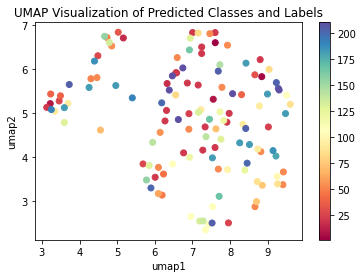

In [50]:
visualize_umap(model, test_loader)

In [3]:
batch_size = 128
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

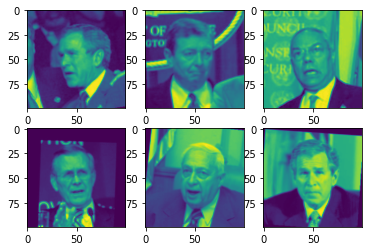

In [64]:
display_images(train_loader, h=2,w=3)

In [26]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 5.63%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        77
           2       0.19      0.10      0.13        39
           3       0.00      0.00      0.00       174
           4       0.00      0.00      0.00        35
           5       0.08      0.39      0.14        23
           6       0.00      0.00      0.00        17
           7       0.05      0.44      0.08        18
           8       0.04      0.18      0.06        17
           9       0.02      0.05      0.03        19

    accuracy                           0.06       444
   macro avg       0.04      0.12      0.04       444
weighted avg       0.03      0.06      0.03       444



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  8.25it/s]


R@1 : 26.577
R@2 : 40.315
R@4 : 56.757
R@8 : 75.225
R@16 : 87.613
R@32 : 94.369


[0.26576576576576577,
 0.40315315315315314,
 0.5675675675675675,
 0.7522522522522522,
 0.8761261261261262,
 0.9436936936936937]

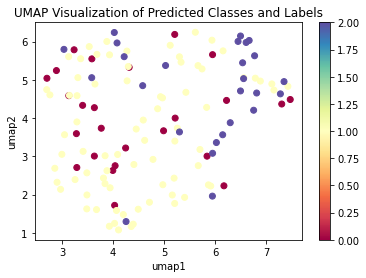

In [28]:
visualize_umap(model, test_loader)

Progress: 1/4 batch
Progress: 2/4 batch
Progress: 3/4 batch
Progress: 4/4 batch


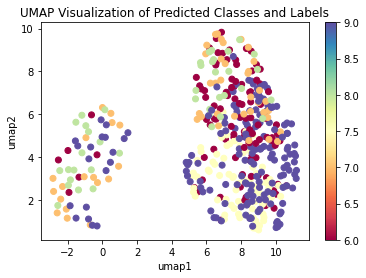

In [29]:
visualize_umap(model, test_loader, single=False)

In [30]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_proxy.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: 12.1838 Time: 1.5610
Epoch [1/20] Loss: 12.1838 Time: 1.5613
Step: [8/8] Epoch [2/20] Loss: 9.9717 Time: 2.9285
Epoch [2/20] Loss: 9.9717 Time: 2.9291
Step: [8/8] Epoch [3/20] Loss: 7.8293 Time: 4.2647
Epoch [3/20] Loss: 7.8293 Time: 4.2650
Step: [8/8] Epoch [4/20] Loss: 5.8099 Time: 5.6134
Epoch [4/20] Loss: 5.8099 Time: 5.6137
Step: [8/8] Epoch [5/20] Loss: 5.8611 Time: 6.9280
Epoch [5/20] Loss: 5.8611 Time: 6.9283
Step: [8/8] Epoch [6/20] Loss: 5.5383 Time: 8.2993
Epoch [6/20] Loss: 5.5383 Time: 8.2996
Step: [8/8] Epoch [7/20] Loss: 3.0057 Time: 9.6443
Epoch [7/20] Loss: 3.0057 Time: 9.6448
Step: [8/8] Epoch [8/20] Loss: 1.3915 Time: 11.0096
Epoch [8/20] Loss: 1.3915 Time: 11.0099
Step: [8/8] Epoch [9/20] Loss: 1.1999 Time: 12.3790
Epoch [9/20] Loss: 1.1999 Time: 12.3795
Step: [8/8] Epoch [10/20] Loss: 1.2447 Time: 13.7463
Epoch [10/20] Loss: 1.2447 Time: 13.7469
Step: [8/8] Epoch [11/20] Loss: 0.7871 Time: 15.1083
Epoch [11/20] Loss: 0.7871 Time: 15.1

In [65]:
model = torch.load('./saved_models/resnet50_lfw10_proxy.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      25.0
           1       0.00      0.00      0.00      77.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00     174.0
           4       0.00      0.00      0.00      35.0
           5       0.00      0.00      0.00      23.0
           6       0.00      0.00      0.00      17.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00      17.0
           9       0.00      0.00      0.00      19.0
          69       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       0.0
          87       0.00      0.00      0.00       0.0
         122       0.00      0.00      0.00       0.0
         158       0.00      0.00      0.00       0.0
         170       0.00      0.00      0.00       0.0
         223       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  8.35it/s]


R@1 : 96.171
R@2 : 97.072
R@4 : 97.748
R@8 : 97.973
R@16 : 98.198
R@32 : 98.423


[0.9617117117117117,
 0.9707207207207207,
 0.9774774774774775,
 0.9797297297297297,
 0.9819819819819819,
 0.9842342342342343]

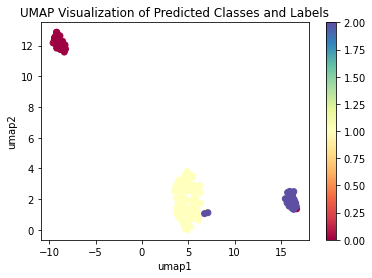

In [67]:
visualize_umap(model, test_loader)

Progress: 1/4 batch
Progress: 2/4 batch
Progress: 3/4 batch
Progress: 4/4 batch


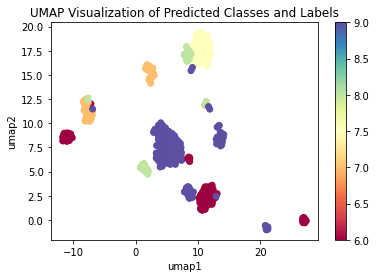

In [34]:
visualize_umap(model, test_loader, single=False)

In [4]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_pfe.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: -2860.1500 Time: 3.0979
Epoch [1/20] Loss: -2860.1500 Time: 3.0984
Step: [8/8] Epoch [2/20] Loss: -2860.4502 Time: 4.1791
Epoch [2/20] Loss: -2860.4502 Time: 4.1796
Step: [8/8] Epoch [3/20] Loss: -2859.4004 Time: 5.2701
Epoch [3/20] Loss: -2859.4004 Time: 5.2702
Step: [8/8] Epoch [4/20] Loss: -2854.5095 Time: 6.3573
Epoch [4/20] Loss: -2854.5095 Time: 6.3575
Step: [8/8] Epoch [5/20] Loss: -2859.3875 Time: 7.4352
Epoch [5/20] Loss: -2859.3875 Time: 7.4353
Step: [8/8] Epoch [6/20] Loss: -2856.5812 Time: 8.5123
Epoch [6/20] Loss: -2856.5812 Time: 8.5128
Step: [8/8] Epoch [7/20] Loss: -2858.2954 Time: 9.5728
Epoch [7/20] Loss: -2858.2954 Time: 9.5729
Step: [8/8] Epoch [8/20] Loss: -2858.2050 Time: 10.6426
Epoch [8/20] Loss: -2858.2050 Time: 10.6427
Step: [8/8] Epoch [9/20] Loss: -2858.1595 Time: 11.7338
Epoch [9/20] Loss: -2858.1595 Time: 11.7342
Step: [8/8] Epoch [10/20] Loss: -2854.7693 Time: 12.9967
Epoch [10/20] Loss: -2854.7693 Time: 12.9969
Step: [8/8] 

In [4]:
model = torch.load('./saved_models/resnet50_lfw10_pfe.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      25.0
           1       0.00      0.00      0.00      77.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00     174.0
           4       0.00      0.00      0.00      35.0
           5       0.00      0.00      0.00      23.0
           6       0.00      0.00      0.00      17.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00      17.0
           9       0.00      0.00      0.00      19.0
          12       0.00      0.00      0.00       0.0
          43       0.00      0.00      0.00       0.0
          46       0.00      0.00      0.00       0.0
          60       0.00      0.00      0.00       0.0
          76       0.00      0.00      0.00       0.0
         101       0.00      0.00      0.00       0.0
         112       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  7.35it/s]


R@1 : 33.333
R@2 : 52.027
R@4 : 67.117
R@8 : 83.108
R@16 : 90.541
R@32 : 96.396


[0.3333333333333333,
 0.5202702702702703,
 0.6711711711711712,
 0.831081081081081,
 0.9054054054054054,
 0.963963963963964]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


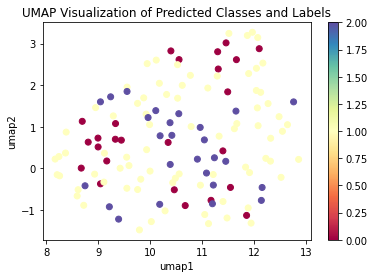

In [6]:
visualize_umap(model, test_loader)

In [8]:
batch_size = 128
train_dataset = make_dataset('CIFAR10', split='train')
test_dataset = make_dataset('CIFAR10', split='test')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Files already downloaded and verified
Files already downloaded and verified


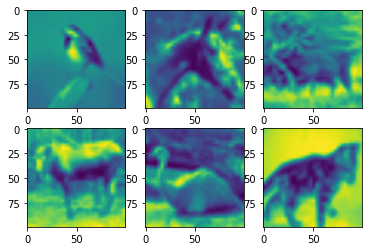

In [9]:
display_images(train_loader, h=2,w=3)

In [4]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 9.34%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      0.17      0.13      1000
           2       0.12      0.06      0.08      1000
           3       0.00      0.00      0.00      1000
           4       0.07      0.04      0.05      1000
           5       0.14      0.01      0.02      1000
           6       0.09      0.62      0.16      1000
           7       0.11      0.02      0.03      1000
           8       0.15      0.02      0.03      1000
           9       0.01      0.00      0.00      1000

    accuracy                           0.09     10000
   macro avg       0.08      0.09      0.05     10000
weighted avg       0.08      0.09      0.05     10000



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:03<00:00,  5.23it/s]


R@1 : 22.380
R@2 : 37.160
R@4 : 55.330
R@8 : 73.550
R@16 : 88.180
R@32 : 95.960


[0.2238, 0.3716, 0.5533, 0.7355, 0.8818, 0.9596]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


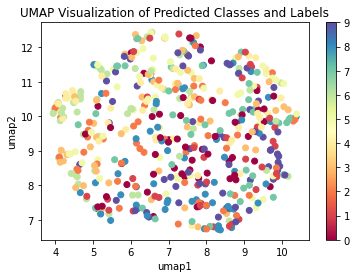

In [5]:
visualize_umap(model, test_loader)

Progress: 1/20 batch
Progress: 2/20 batch
Progress: 3/20 batch
Progress: 4/20 batch
Progress: 5/20 batch
Progress: 6/20 batch
Progress: 7/20 batch
Progress: 8/20 batch
Progress: 9/20 batch
Progress: 10/20 batch
Progress: 11/20 batch
Progress: 12/20 batch
Progress: 13/20 batch
Progress: 16/20 batch
Progress: 17/20 batch
Progress: 18/20 batch
Progress: 19/20 batch
Progress: 20/20 batch


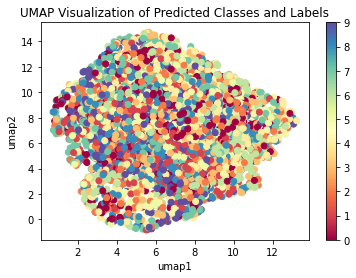

In [20]:
visualize_umap(model, test_loader, single=False)

In [4]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_cifar10_proxy_library.ptm')

Step: [19/98] Epoch [1/20] Loss: 3.0135 Time: 8.8502
Step: [38/98] Epoch [1/20] Loss: 5.8117 Time: 15.2203
Step: [57/98] Epoch [1/20] Loss: 8.4794 Time: 21.6516
Step: [76/98] Epoch [1/20] Loss: 11.0947 Time: 28.1410
Step: [95/98] Epoch [1/20] Loss: 13.6692 Time: 34.6396
Step: [98/98] Epoch [1/20] Loss: 14.0699 Time: 35.5630
Epoch [1/20] Loss: 14.0699 Time: 35.5656
Step: [19/98] Epoch [2/20] Loss: 2.3132 Time: 42.2465
Step: [38/98] Epoch [2/20] Loss: 4.7124 Time: 48.6924
Step: [57/98] Epoch [2/20] Loss: 7.1101 Time: 55.1664
Step: [76/98] Epoch [2/20] Loss: 9.4780 Time: 61.5809
Step: [95/98] Epoch [2/20] Loss: 11.8300 Time: 67.9389
Step: [98/98] Epoch [2/20] Loss: 12.1862 Time: 68.8354
Epoch [2/20] Loss: 12.1862 Time: 68.8376
Step: [19/98] Epoch [3/20] Loss: 1.9612 Time: 75.4898
Step: [38/98] Epoch [3/20] Loss: 4.1751 Time: 82.0829
Step: [57/98] Epoch [3/20] Loss: 6.4232 Time: 88.5462
Step: [76/98] Epoch [3/20] Loss: 8.5233 Time: 95.0408
Step: [95/98] Epoch [3/20] Loss: 10.6703 Time: 101

In [5]:
model = torch.load('./saved_models/resnet50_cifar10_proxy_library.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1000.0
           1       0.00      0.00      0.00    1000.0
           2       0.00      0.00      0.00    1000.0
           3       0.00      0.00      0.00    1000.0
           4       0.00      0.00      0.00    1000.0
           5       0.00      0.00      0.00    1000.0
           6       0.00      0.00      0.00    1000.0
           7       0.00      0.00      0.00    1000.0
           8       0.00      0.00      0.00    1000.0
           9       0.00      0.00      0.00    1000.0
          10       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       0.0
          32       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       0.0
          48       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:03<00:00,  5.06it/s]


R@1 : 91.370
R@2 : 94.010
R@4 : 95.770
R@8 : 96.710
R@16 : 97.360
R@32 : 97.920


[0.9137, 0.9401, 0.9577, 0.9671, 0.9736, 0.9792]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


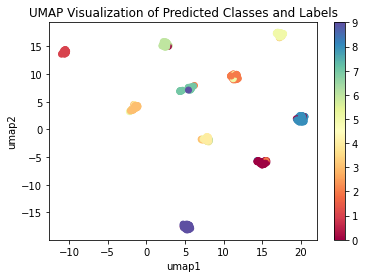

In [7]:
visualize_umap(model, test_loader)

Progress: 1/20 batch
Progress: 2/20 batch
Progress: 3/20 batch
Progress: 4/20 batch
Progress: 5/20 batch
Progress: 6/20 batch
Progress: 7/20 batch
Progress: 8/20 batch
Progress: 9/20 batch
Progress: 10/20 batch
Progress: 11/20 batch
Progress: 12/20 batch
Progress: 13/20 batch
Progress: 14/20 batch
Progress: 15/20 batch
Progress: 16/20 batch
Progress: 17/20 batch
Progress: 18/20 batch
Progress: 19/20 batch
Progress: 20/20 batch


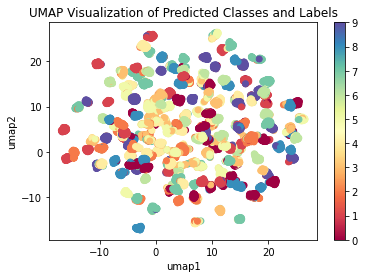

In [8]:
visualize_umap(model, test_loader, single=False)